## Follow https://umap-learn.readthedocs.io/en/latest/transform.html
- Idea is to use UMAP to learn low dimensional latent space and train an ML model on top of it

In [1]:
import numpy as np
import pandas as pd

In [2]:
import umap
import umap.plot

/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
digits = load_digits()

In [6]:
X = digits.data
y = digits.target
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1797, 64)
Shape of y: (1797,)


In [7]:
## Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (1347, 64)
Shape of X_test: (450, 64)


## 1. Train model without dimensionality reduction using UMAP

In [13]:
svc_pipeline = Pipeline(steps=[('scaler', StandardScaler(with_mean=True, with_std=True)), ('svc', SVC())])
svc_pipeline.fit(X_train, y_train)
svc_prediction = svc_pipeline.predict(X_test)

In [15]:
knn_pipeline = Pipeline(steps=[('scaler', StandardScaler(with_mean=True, with_std=True)), ('knn', KNeighborsClassifier())])
knn_pipeline.fit(X_train, y_train)
knn_prediction = knn_pipeline.predict(X_test)

In [19]:
svc_pipeline.score(X_test, y_test), knn_pipeline.score(X_test, y_test)

(0.98, 0.9644444444444444)

## 2. Train model with UMAP reduction to 2 components

In [20]:
umap_svc_pipeline = Pipeline(steps=[('scaler', StandardScaler(with_mean=True, with_std=True)), ('umap', umap.UMAP(n_neighbors=5, random_state=42)), ('svc', SVC())])
umap_svc_pipeline.fit(X_train, y_train)
umap_svc_prediction = umap_svc_pipeline.predict(X_test)

/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [22]:
umap_knn_pipeline = Pipeline(steps=[('scaler', StandardScaler(with_mean=True, with_std=True)), ('umap', umap.UMAP(n_neighbors=5, random_state=42)), ('knn', KNeighborsClassifier())])
umap_knn_pipeline.fit(X_train, y_train)
umap_knn_prediction = umap_knn_pipeline.predict(X_test)

/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [32]:
umap_svc_pipeline.score(X_test, y_test), umap_knn_pipeline.score(X_test, y_test)

/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/hardiksahi/Personal/Classical-Machine-Learning/classical_ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(0.9644444444444444, 0.9644444444444444)

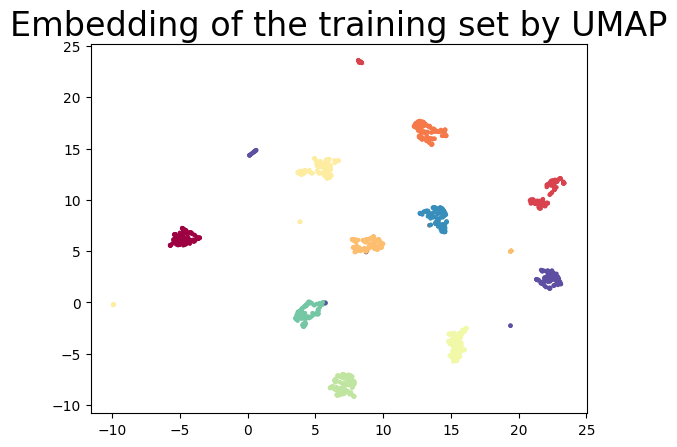

In [30]:
plt.scatter(umap_knn_pipeline.named_steps["umap"].embedding_[:, 0], umap_knn_pipeline.named_steps["umap"].embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);